In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Gaurav Ugale\Desktop\Diabetes proj\diabetesLogistic.csv")
df=data.copy()

In [3]:
df.shape

(768, 9)

In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df1=df[df['Outcome']==1]

Text(0, 0.5, 'No of People having diabetes')

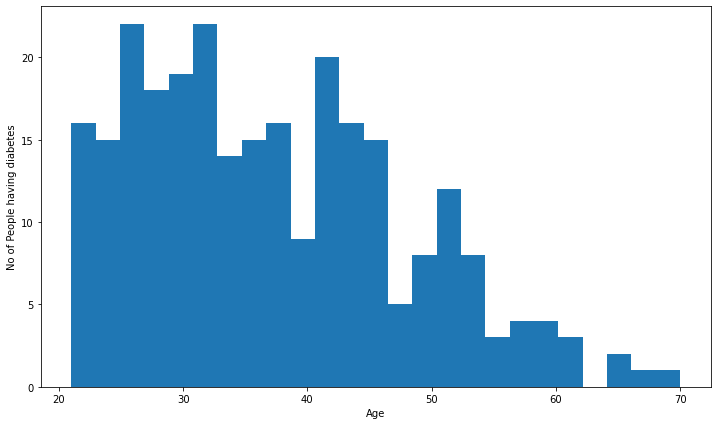

In [8]:
plt.figure(figsize=(12, 7))
plt.hist(df1['Age'],bins=25)
plt.xlabel('Age')
plt.ylabel('No of People having diabetes')

In [ ]:
## show people in age group of 20 to 40 have higher chances of being diabetic

Text(0, 0.5, 'No of People having diabetes')

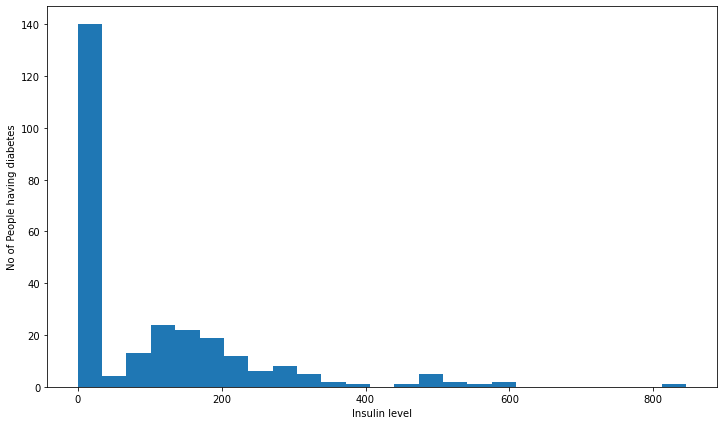

In [9]:
plt.figure(figsize=(12, 7))
plt.hist(df1['Insulin'],bins=25)
plt.xlabel('Insulin level')
plt.ylabel('No of People having diabetes')

In [10]:
df1['Insulin'].value_counts()

0      138
130      6
180      4
175      3
156      3
      ... 
29       1
171      1
249      1
140      1
510      1
Name: Insulin, Length: 93, dtype: int64

In [ ]:
#as in genral we know people who dont have diabetes ,insulin is fine for them

Text(0, 0.5, 'No of People having diabetes')

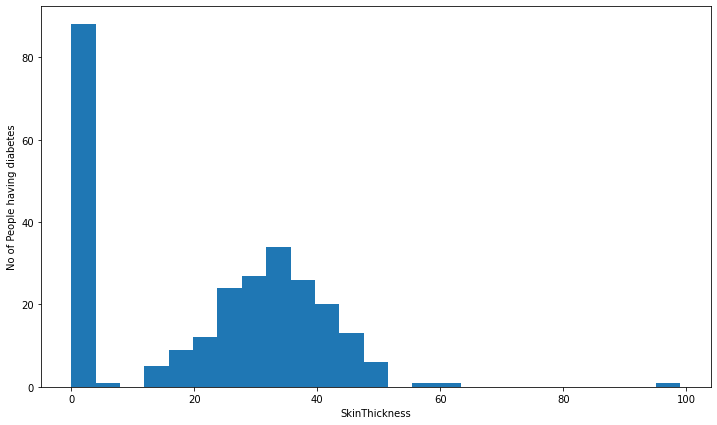

In [11]:
plt.figure(figsize=(12, 7))
plt.hist(df1['SkinThickness'],bins=25)
plt.xlabel('SkinThickness')
plt.ylabel('No of People having diabetes')

In [12]:
df.groupby('Pregnancies')['Outcome'].sum()

Pregnancies
0     38
1     29
2     19
3     27
4     23
5     21
6     16
7     25
8     22
9     18
10    10
11     7
12     4
13     5
14     2
15     1
17     1
Name: Outcome, dtype: int64

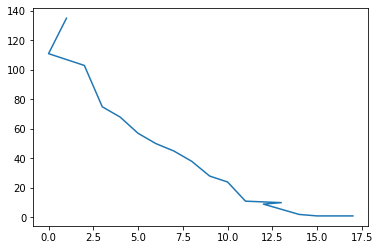

In [13]:
plt.plot(df['Pregnancies'].value_counts().index,df['Pregnancies'].value_counts())

<AxesSubplot:>

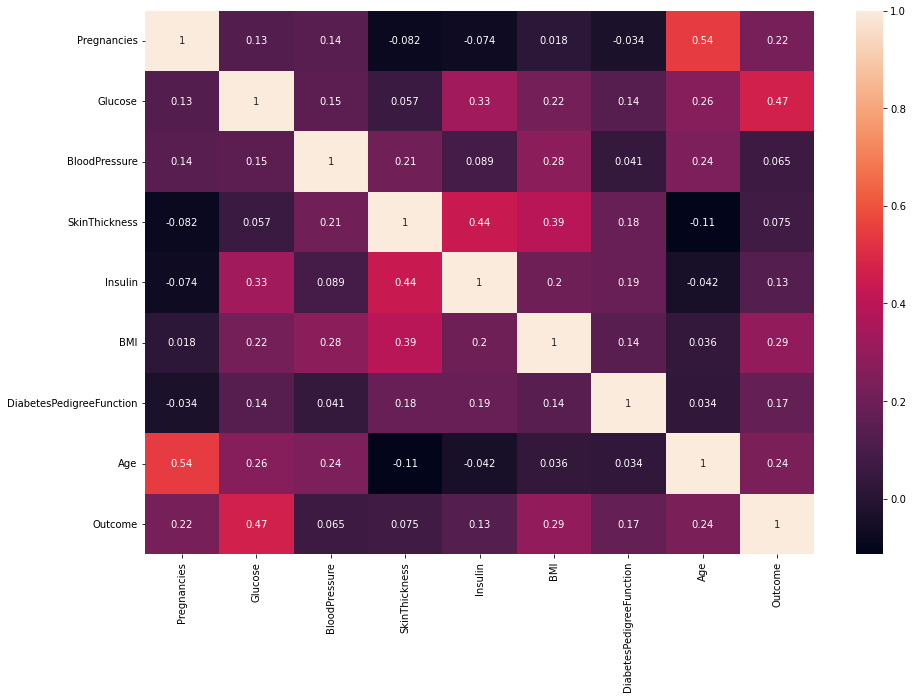

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Sampling

In [16]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=111)

In [17]:
x_train=train.iloc[:,:-1]
x_test=test.iloc[:,:-1]
y_train=train.iloc[:,-1]
y_test=test.iloc[:,-1]

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [19]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
rf.feature_importances_

array([0.07976147, 0.26213714, 0.08789902, 0.06822836, 0.07370408,
       0.1638051 , 0.1158048 , 0.14866002])

In [21]:
from sklearn.model_selection import GridSearchCV

dict1={'criterion':['gini','entropy'],'n_estimators':range(1,11),'min_samples_split':range(2,50)}
gs=GridSearchCV(rf,param_grid=dict1)

In [22]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(2, 50),
                         'n_estimators': range(1, 11)})

In [23]:
gs.best_params_

{'criterion': 'entropy', 'min_samples_split': 37, 'n_estimators': 9}

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(criterion='gini',min_samples_split=44,n_estimators=8)

In [25]:
rf1.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=44, n_estimators=8)

In [26]:
rf1.feature_importances_

array([0.05226809, 0.30168413, 0.05280033, 0.04262637, 0.0766549 ,
       0.19922223, 0.08179685, 0.1929471 ])

In [27]:
imp_features=pd.DataFrame({'features':x_train.columns,'importance':rf1.feature_importances_})

In [28]:
imp_features.sort_values('importance',ascending=False)

,features,importance
1,Glucose,0.301684
5,BMI,0.199222
7,Age,0.192947
6,DiabetesPedigreeFunction,0.081797
4,Insulin,0.076655
2,BloodPressure,0.052800
0,Pregnancies,0.052268
3,SkinThickness,0.042626


In [29]:
pred_rf=rf.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_rf,y_test)

array([[82, 22],
       [19, 31]], dtype=int64)

In [37]:
print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       104
           1       0.58      0.62      0.60        50

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.74      0.73      0.74       154



In [32]:
## lOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred_lg=lg.predict(x_test)

In [34]:
confusion_matrix(y_pred_lg,y_test)

array([[84, 22],
       [17, 31]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_pred_lg,y_test))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       106
           1       0.58      0.65      0.61        48

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.75      0.75      0.75       154

